In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv')

In [3]:
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


In [4]:
y = df['logS']
y

0      -2.180
1      -2.000
2      -1.740
3      -1.480
4      -3.040
        ...  
1139    1.144
1140   -4.925
1141   -3.893
1142   -3.790
1143   -2.581
Name: logS, Length: 1144, dtype: float64

In [5]:
x = df.drop('logS',axis =1)
x

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=100) 

In [7]:
x_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


In [8]:
x_test

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


In [9]:
 from sklearn.linear_model import LinearRegression
 lr=LinearRegression()
 lr.fit(x_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)
y_lr_test_pred


array([-3.05722870e+00, -7.77785827e+00, -2.55016650e+00, -2.01523582e+00,
       -2.06375990e+00, -9.99672215e-01, -5.94603364e-01, -5.53626003e-01,
       -5.72200956e+00, -3.94006681e+00, -3.95496755e+00, -2.29737009e+00,
       -1.48980354e+00, -1.48988982e+00, -4.64510806e+00, -1.90396018e+00,
       -1.51566313e+00, -3.16424605e+00, -3.70863920e+00, -5.58105660e+00,
       -3.25038467e+00, -5.04235077e+00, -5.69194881e+00, -2.14339849e+00,
       -4.35689341e+00, -5.03964756e+00, -3.10383618e+00, -4.40286964e+00,
       -4.21276272e+00,  5.56508349e-01, -1.45537678e+00, -4.41027396e+00,
       -2.59668773e+00, -1.53336276e+00, -5.55749874e-01, -1.67111795e+00,
       -2.78163675e+00, -3.15395565e+00, -5.27083361e+00, -1.75321446e+00,
       -1.53350725e+00, -2.01255666e+00, -6.57559167e+00, -7.89433046e+00,
       -5.76437127e+00, -4.16422068e+00, -3.43694663e+00,  1.43834212e+00,
       -1.12679105e-02, -2.34521849e+00, -1.86480046e+00, -5.03964756e+00,
        8.55886378e-01, -

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_test, y_lr_test_pred))
print("R2:", r2_score(y_test, y_lr_test_pred))
print("MSE:", mean_squared_error(y_train, y_lr_train_pred))
print("R2:", r2_score(y_train, y_lr_train_pred))

MSE: 1.0206953660861033
R2: 0.7891616188563282
MSE: 1.0075362951093687
R2: 0.7645051774663391


In [12]:
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)


Coefficients: [-0.73892858 -0.00644945 -0.00262957 -0.4428987 ]
Intercept: 0.22249452399664316


In [13]:
from sklearn.ensemble import RandomForestRegressor

rf =RandomForestRegressor(max_depth=2,random_state=100)
rf.fit(x_train,y_train)
rf



,n_estimators,100
,criterion,'squared_error'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
rf_pred_train = rf.predict(x_train)
rf_pred_test = rf.predict(x_test)
rf_pred_train,rf_pred_test

(array([-4.44388581, -1.40132433, -1.41481453, -1.41481453, -1.44411435,
        -2.67492782, -2.50755276, -3.95611327, -4.62529592, -2.27343298,
        -2.69241199, -4.5150244 , -1.41481453, -2.67492782, -7.14501987,
        -2.30422396, -4.0676017 , -3.36086239, -2.53282364, -4.5150244 ,
        -2.47178242, -4.0676017 , -2.66143763, -1.42912192, -1.2164651 ,
        -7.14501987, -2.67492782, -2.47178242, -7.14501987, -1.2164651 ,
        -4.5150244 , -1.2164651 , -7.14501987, -1.41481453, -1.64246378,
        -4.5150244 , -4.5150244 , -1.41481453, -2.71012897, -1.64246378,
        -2.42959807, -2.89446137, -2.47178242, -1.24495146, -2.69241199,
        -1.2164651 , -1.2164651 , -4.65157679, -2.6279475 , -1.2164651 ,
        -1.79134844, -4.5150244 , -1.2164651 , -4.44388581, -4.62529592,
        -4.0676017 , -4.5150244 , -2.66143763, -1.41481453, -4.0676017 ,
        -2.67492782, -1.40132433, -3.32568382, -2.51725697, -4.44388581,
        -7.14501987, -7.14501987, -1.44411435, -4.5

In [15]:
from sklearn.metrics import mean_squared_error,r2_score

In [16]:
print("M2:",mean_squared_error(y_train,rf_pred_train))
print("M2:",mean_squared_error(y_test,rf_pred_test))


M2: 1.028227802112806
M2: 1.407688264904896


## Data Visualization 

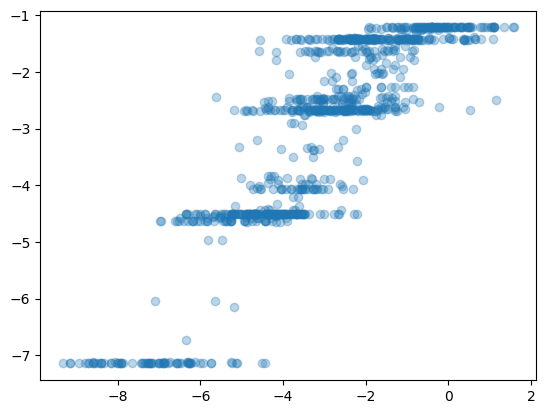

In [17]:
import matplotlib.pyplot as plt
pt=plt.scatter(x=y_train,y=rf_pred_train,alpha=0.3)
pt

In [18]:
from joblib import dump
dump(rf,"Drug_classifier.joblib")

['Drug_classifier.joblib']